<a href="https://colab.research.google.com/github/jrgreen7/SYSC4906/blob/master/Assignments/Assignment3/SYSC4906_Assig3_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SYSC4906 Assignment 3

**Group Name:** 

**Student names:**

**Student numbers:** 


# Discussion of Solution
Your notebook must begin with **this** text cell containing a description of your solution. In this discussion, include links to any resources that you used in developing your solution. Use proper MarkDown syntax to format your discussion.**This description should be approximately 500 words in length and cover the following:**

1. Which machine learning approach did you use?

2. How did you split your data between training and testing? 
_(e.g. hold-out test, cross-validation, repeated bootstrap samples, etc)_

3. How did you train your classifier?
If you used transfer learning, describe how you did so.

4. How did you estimate your future performance _(worst recall, best precision, overall accuracy)_?

   **Here are our final predictions:**
   1. Building with worst recall:
   2. Building with best precision
   3. Overall accuracy)

5. Discuss the performance of your model. Which buildings did it do the best/worst on and why? What are the strengths and limitations of your method. 

6. What would you have done differently if you had more time?


# Code to Train Your Method
_We will look at this, but will not run it when measuring your accuracy. Please structure your training code into logical steps, so that we can easily understand it_
## Step 1: Load the image dataset...

In [0]:
from glob import glob

# Load data from...


##Step N: Save the model to file

In [0]:
# Whatever code is required to save your trained model to a file. 
# Should be re-loaded by prepareModel() during testing.

#Required functions to test your method
_These are the five required methods that you must implement._

## prepareModel()
This function should prepare your model for multiple invocations of classifyImage(fname). For example, this function could be used to load a pre-trained model from a URL, where that model is then used by  classifyImage(fname). You should use global variables for any variables initialized by this function.

Runtime of this method is **limited to 5 minutes**, so please don’t retrain your network here. All training should be captured in a pre-trained model to be loaded by this method.


In [0]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# List of building codes to use throughout notebook.
buildingCodes = ('AA', 'CB', 'CT', 'DT', 'FH', 'HP', 'HS', 'LB', 'MC', 'ME', 'ML', 'PA', 'RB', 'RO', 'SA', 'TB')

def prepareModel():
  global model # Sample global variable that you may populate here.

  model = 'No model loaded.'



## label = classifyImage(fname)
Accepts a filename (e.g. ‘test/ME/testImage1.jpg’) of a square JPG image with size at least 500x500 pixels.
Returns a 2-character label corresponding to the predicted building (see table of labels above)

Any variables initialized by prepareModel() should be declared as global within this function if you want to access them (e.g. a pre-trained model)


In [0]:
def classifyImage(fname):
  global model # Sample global variable that you may populate in prepareModel and use here.

  print("Predicting class of '{0:s}' using model '{1:s}'".format(fname,model))
  return buildingCodes[0] #Default behaviour to override


## label = worstRecall()
Returns the label of a building that you expect will have to lowest recall, when tested on new images

In [0]:
def worstRecall():
  return buildingCodes[0] #Default behaviour to override


## label = bestPrecision()
Returns the label of a building that you expect will have to highest precision, when tested on new images

In [0]:
def bestPrecision():
  return buildingCodes[0] #Default behaviour to override


##acc_score = estimatedAccuracy()
Returns the accuracy (between [0.0,1.0]) that you expect to achieve across all test images, assuming that each building is equally represented


In [0]:
# Function to return estimated accuracy that will be obtained across all test images
def estimatedAccuracy():
  return 1.0 #Default behaviour to override

# Test required functions
_We will replace the text below with our actual test code..._

Predicting class of 'SampleImages/AA_1.jpg' using model 'No model loaded.'


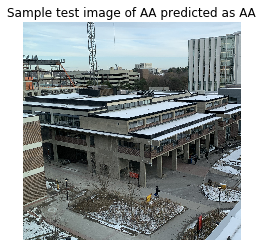

Correct!
Predicting class of 'SampleImages/CB_1.jpg' using model 'No model loaded.'


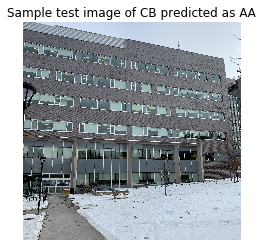

Incorrect...
Predicting class of 'SampleImages/DT_1.jpg' using model 'No model loaded.'


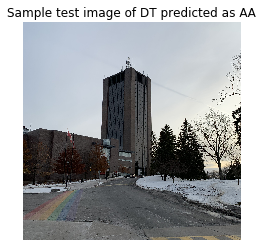

Incorrect...
Predicting class of 'SampleImages/HS_1.jpg' using model 'No model loaded.'


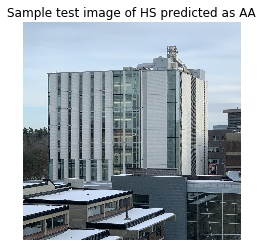

Incorrect...
Expected that worst recall would be on AA
Expected that best precision would be on AA
Expected total accuracy would be 1.000
Actual total accuracy is 0.250


In [0]:
import numpy as np
from PIL import Image, ExifTags
import matplotlib.pyplot as plt
from glob import glob


# First prepare the model:
prepareModel() # Limited to 5 minutes...

# Load (secret) test data into local Colab environment
!wget https://github.com/jrgreen7/SYSC4906/blob/master/Assignments/Assignment3/Images/SampleImages.zip?raw=true
!unzip SampleImages.zip?raw=true #Should create 4 images
test_images = sorted(glob('SampleImages/*.jpg'))
actual_labels = (buildingCodes[0],buildingCodes[1],buildingCodes[3],buildingCodes[6])

# Classify sample test images:
TP = 0
for imgFname,actual_label in (zip(test_images,actual_labels)):
  pred_label = classifyImage(imgFname) # Predict the label of this image file

  # Plot the image with actual and predicted labels
  # Note that we may have to rotate the image, depending on the 
  # orientation of the camera. Use EXIF tags for this:
  im = Image.open(imgFname)
  for orientation in ExifTags.TAGS.keys() : 
    if ExifTags.TAGS[orientation]=='Orientation' : break 
  exif=dict(im._getexif().items())

  if exif[orientation] == 3 : 
    im=im.rotate(180, expand=True)
  elif exif[orientation] == 6 : 
    im=im.rotate(270, expand=True)
  elif exif[orientation] == 8 : 
    im=im.rotate(90, expand=True)

  im = im.convert('RGB') # May not be necessary?

  plt.title("Sample test image of {0:s} predicted as {1:s}".format(actual_label, pred_label))
  plt.imshow(np.asarray(im))
  plt.axis('off')
  plt.show()

  if (pred_label==actual_label):
    print('Correct!')
    TP += 1
  else:
    print("Incorrect...")

# Print the predicted performance:
print("Expected that worst recall would be on {0:s}".format(worstRecall()))
print("Expected that best precision would be on {0:s}".format(bestPrecision()))
print("Expected total accuracy would be {0:.3f}".format(estimatedAccuracy()))
print("Actual total accuracy is {0:.3f}".format((TP)/(len(test_images))))
